In [1]:
from skimpy import skim #data summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import charset_normalizer
import seaborn as sns
import plotly.express as px #interactive visualization
import charset_normalizer

In [2]:
with open("visualizing_global_co2_data_cleaned.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [3]:
data = pd.read_csv('visualizing_global_co2_data_cleaned.csv', encoding = 'ascii')
df = pd.DataFrame(data)


In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 23494  │ │ float64     │ 52    │                                                          │
│ │ Number of columns │ 55     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃      ┃       ┃          ┃           ┃        ┃         ┃         ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA   ┃ NA %  ┃ mean     ┃ sd        ┃ p0     ┃ p25     ┃ p50     ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ year     │    0 │     0 │     1962 │     42.91 │   1850 │    1935 │    1970 │     1997 │     2021 │ ▂▂▃▅▇▇ │  │
│ │ populati │  926 │  3.94 │ 92860000 │ 418500000 │   1480 │ 1415000 │ 5340000 │ 21760000 │ 79090000 │   ▇    │  │
│ │ on       │      │       │          │           │        │         │         │          │       00 │        │  │
│ │ cement_c │ 3502 │ 14.91 │    10.48 │     70.27 │      0 │       0 │   0.116 │    1.287 │     1673 │   ▇    │  │
│ │ o2       │      │       │          │           │        │         │         │          │          │        │  │
│ │ cement_c │ 3574 │ 15.21 │  0.07293 │    0.1289 │      0 │       0 │   0.016 │    0.104 │    2.574 │   ▇    │  │
│ │ o2_per_c │      │       │          │           │        │         │         │          │          │        │  │
│ │ apita    │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2      │    0 │     0 │    348.1 │      1755 │      0 │   0.575 │    5.27 │    50.21 │    37120 │   ▇    │  │
│ │ co2_grow │  269 │  1.14 │     7.04 │     65.47 │  -1818 │  -0.011 │   0.073 │    1.268 │     1860 │    ▇▁  │  │
│ │ th_abs   │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_grow │  307 │  1.31 │    21.44 │     725.4 │   -100 │  -0.893 │   4.088 │    10.93 │   102300 │   ▇    │  │
│ │ th_prct  │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │  953 │  4.06 │      535 │      2153 │   -187 │   6.346 │   28.74 │    129.1 │    41640 │   ▇    │  │
│ │ uding_lu │      │       │          │           │        │         │         │          │          │        │  │
│ │ c        │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │ 1232 │  5.24 │    7.797 │     96.02 │  -2318 │  -0.722 │   0.103 │    2.747 │     2247 │     ▇  │  │
│ │ uding_lu │      │       │          │           │        │         │         │          │          │        │  │
│ │ c_growth │      │       │          │           │        │         │         │          │          │        │  │
│ │ _abs     │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │ 1166 │  4.96 │    13.01 │     732.1 │ -36

In [5]:
 info = pd.DataFrame({
    "Count":df.shape[0],
    "Null":df.isnull().sum(),
    "Null %":df.isnull().mean() * 100,
    "Zeros":(df == 0).sum(),
    "Zeros %":(df == 0).mean() * 100,
    "Unique":df.nunique(),
    "Duplicated":(df.duplicated() == True).sum(),
  
})
info

,Count,Null,Null %,Zeros,Zeros %,Unique,Duplicated
country,23494,0,0.000000,0,0.000000,237,0
year,23494,0,0.000000,0,0.000000,172,0
iso_code,23494,2786,11.858347,0,0.000000,219,0
population,23494,926,3.941432,0,0.000000,22522,0
cement_co2,23494,3502,14.905933,7137,30.377969,5261,0
cement_co2_per_capita,23494,3574,15.212395,7350,31.284583,691,0
co2,23494,0,0.000000,102,0.434153,14459,0
co2_growth_abs,23494,269,1.144973,1013,4.311739,8951,0
co2_growth_prct,23494,307,1.306717,850,3.617945,14923,0
co2_including_luc,23494,953,4.056355,11,0.046820,18711,0


#Eliminar datos C02 = 0

In [6]:
co2_zeros = (df["co2"] == 0).sum()

df = df.drop(df[df["co2"] == 0].index)
print(co2_zeros)

102


In [7]:
df_it1 = df[["country","year","co2","co2_including_luc"]]


info1 = pd.DataFrame({
    "Count":df_it1.shape[0],
    "Null":df_it1.isnull().sum(),
    "Null %":df_it1.isnull().mean() * 100,
    "Zeros":(df_it1 == 0).sum(),
    "Zeros %":(df_it1 == 0).mean() * 100,
    "Unique":df_it1.nunique(),
    "Duplicated":(df_it1.duplicated() == True).sum(),
    "Under Zeros":(df_it1["co2_including_luc"] < 0).sum() 
})
info1

,Count,Null,Null %,Zeros,Zeros %,Unique,Duplicated,Under Zeros
country,23392,0,0.000000,0,0.0000,237,0,369
year,23392,0,0.000000,0,0.0000,172,0,369
co2,23392,0,0.000000,0,0.0000,14458,0,369
co2_including_luc,23392,953,4.074042,8,0.0342,18675,0,369


Imputamos el valor de Co2 a co2_including_luc, cuando co2_including_luc < 0

In [8]:
import pandas as pd

df_it1 = df[[ "year", "co2", "co2_including_luc"]].copy()


info1 = pd.DataFrame({
    "Count": [df_it1.shape[0]] * len(df_it1.columns),
    "Null": df_it1.isnull().sum(),
    "Null %": df_it1.isnull().mean() * 100,
    "Zeros": (df_it1 == 0).sum(),
    "Zeros %": (df_it1 == 0).mean() * 100,
    "Unique": df_it1.nunique(),
    "Duplicated": [df_it1.duplicated().sum()] * len(df_it1.columns),
    "Under Zeros": (df_it1 < 0).sum()
}, index=df_it1.columns)

print(info1)
df_it1["country"] =df["country"]
df_it1.columns

                   Count  Null    Null %  Zeros  Zeros %  Unique  Duplicated  \
year               23392     0  0.000000      0   0.0000     172         132   
co2                23392     0  0.000000      0   0.0000   14458         132   
co2_including_luc  23392   953  4.074042      8   0.0342   18675         132   

                   Under Zeros  
year                         0  
co2                          0  
co2_including_luc          369  


Index(['year', 'co2', 'co2_including_luc', 'country'], dtype='object')

### Which sectors are most responsible for emissions, and how has their
### contribution varied over the decades?

In [9]:
df_it2 = df[[ "year","cement_co2", "coal_co2","flaring_co2", "gas_co2","land_use_change_co2", "oil_co2"]].copy()

info2 = pd.DataFrame({
    "Count": [df_it2.shape[0]] * len(df_it2.columns),
    "Null": df_it2.isnull().sum(),
    "Null %": df_it2.isnull().mean() * 100,
    "Zeros": (df_it2 == 0).sum(),
    "Zeros %": (df_it2 == 0).mean() * 100,
    "Unique": df_it2.nunique(),
    "Duplicated": [df_it2.duplicated().sum()] * len(df_it2.columns),
    "Under Zeros": (df_it2 < 0).sum()
}, index=df_it2.columns)

print(info2)

                     Count  Null     Null %  Zeros    Zeros %  Unique  \
year                 23392     0   0.000000      0   0.000000     172   
cement_co2           23392  3481  14.881156   7056  30.164159    5261   
coal_co2             23392     0   0.000000   6719  28.723495   10076   
flaring_co2          23392    95   0.406122  18370  78.531122    3266   
gas_co2              23392    27   0.115424  14120  60.362517    6168   
land_use_change_co2  23392   953   4.074042    915   3.911594    7001   
oil_co2              23392     0   0.000000   2335   9.982045   10528   

                     Duplicated  Under Zeros  
year                        112            0  
cement_co2                  112            0  
coal_co2                    112            0  
flaring_co2                 112            0  
gas_co2                     112            0  
land_use_change_co2         112         3470  
oil_co2                     112            0  


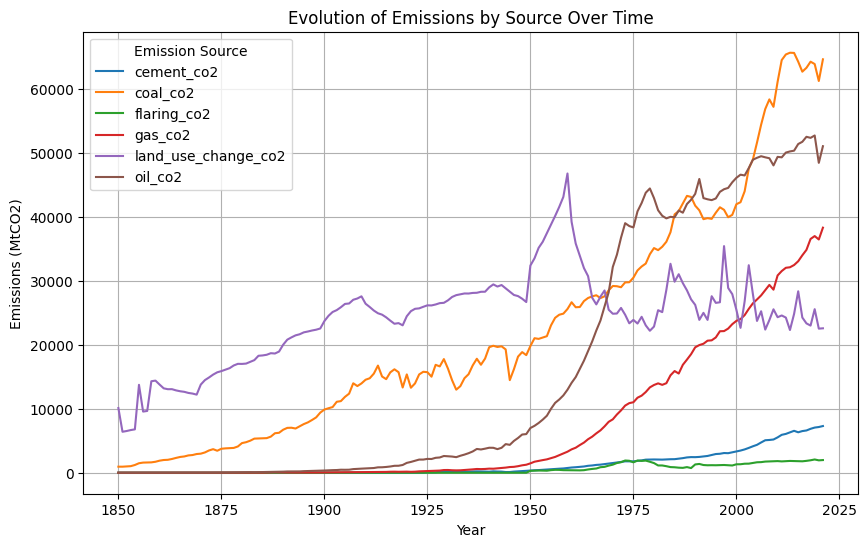

In [10]:
df_it2_grouped = df_it2.groupby("year").sum().reset_index()

plt.figure(figsize=(10, 6))

for column in df_it2_grouped.columns[1:]:
    plt.plot(df_it2_grouped["year"], df_it2_grouped[column], label=column)

plt.xlabel("Year")
plt.ylabel("Emissions (MtCO2)")
plt.title("Evolution of Emissions by Source Over Time")
plt.legend(title="Emission Source")
plt.grid(True)
plt.show()

#Total Co2 agrupado en años

## histograma de valores nulos de cement

TypeError: bar_label() missing 1 required positional argument: 'container'

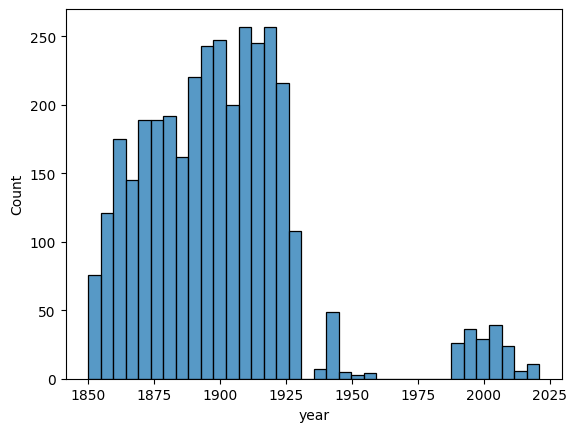

In [20]:
df_cement_nulls = df[df["cement_co2"].isnull()][["year", "cement_co2"]]
df_cement_nulls.head()

sns.histplot(data=df_cement_nulls, x="year")
plt.show()

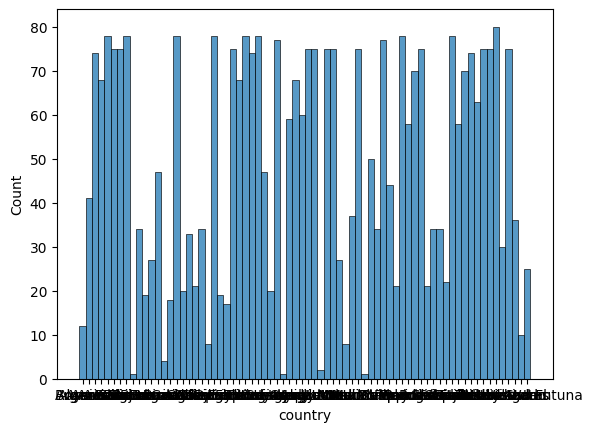

In [22]:
df_cement_nulls = df[df["cement_co2"].isnull()][["country", "cement_co2"]]
df_cement_nulls.head()

sns.histplot(data=df_cement_nulls, x="country")
plt.show()

   year  total_co2
0  1850    944.824
1  1851    944.689
2  1852    984.086
3  1853   1025.620
4  1854   1209.253
     year   total_co2
167  2017  160554.783
168  2018  163412.616
169  2019  164192.960
170  2020  156631.574
171  2021  164670.489


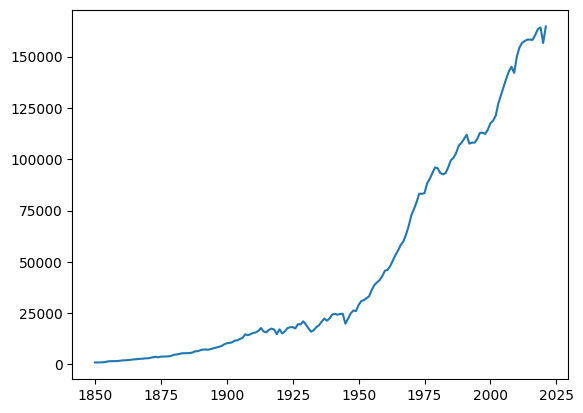

In [11]:
co2_data = df.groupby("year")["co2"].sum().reset_index(name = "total_co2")
print(co2_data.head())
print(co2_data.tail())

plt.plot(co2_data["year"], co2_data['total_co2'])

   year  total_co2
0  1850   7940.749
1  1851   4589.305
2  1852   4703.265
3  1853   4871.572
4  1854   5145.123
     year   total_co2
167  2017  183846.903
168  2018  186359.297
169  2019  189707.654
170  2020  179101.700
171  2021  187205.894


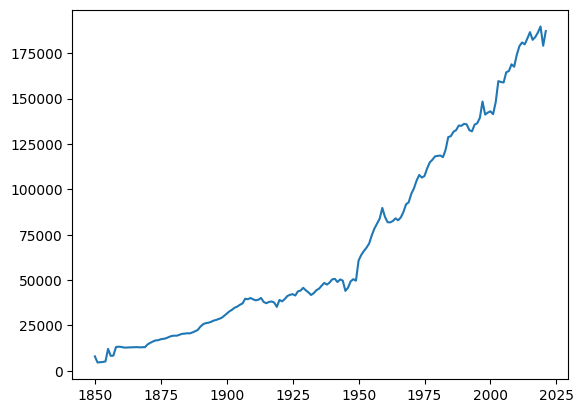

In [12]:
co2_data = df.groupby("year")["co2_including_luc"].sum().reset_index(name = "total_co2")
print(co2_data.head())
print(co2_data.tail())

plt.plot(co2_data["year"], co2_data['total_co2'])

   year  total_co2
0  1850        0.0
1  1851        0.0
2  1852        0.0
3  1853        0.0
4  1854        0.0
     year  total_co2
167  2017   1856.108
168  2018   1946.745
169  2019   2071.768
170  2020   1935.357
171  2021   1979.794


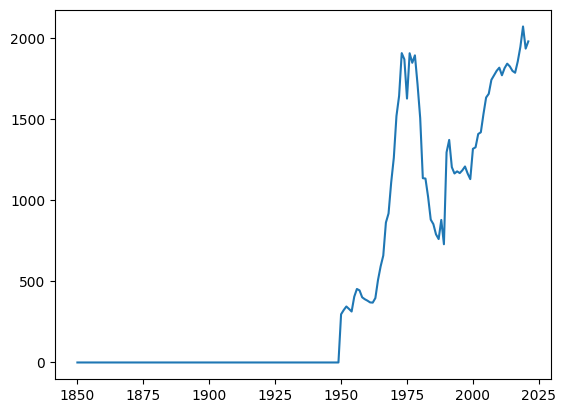

In [13]:
co2_data = df.groupby("year")["flaring_co2"].sum().reset_index(name = "total_co2")
print(co2_data.head())
print(co2_data.tail())

plt.plot(co2_data["year"], co2_data["total_co2"])